## DEEP LEARNING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PENYIAPAN DATA GAMBAR

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

## 1.1. Penyiapan direktori dan Data

In [3]:
# inisiasi path data gambar
images_path = "/content/drive/MyDrive/Vegetable Images"
train_path = "/train"
val_path = "/validation"
test_path = "/test"

In [4]:
subdirectories = [f.name for f in os.scandir(images_path+train_path) if f.is_dir()]

print("Daftar nama subdirektori:")
for subdir in subdirectories:
    print(subdir)

Daftar nama subdirektori:
Cauliflower
Broccoli


In [5]:
# fungsi untuk menampilkan contoh gambar secara acak
def view_random_image(data_dir, class_dir, n_row=1, n_col=1):
    target_dir = images_path + "/" + data_dir + "/" + class_dir + "/"

    rand_images = random.sample(os.listdir(target_dir), 4)

    fig, axs = plt.subplots(n_row, n_col)

    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_images[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}\n{img.shape}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

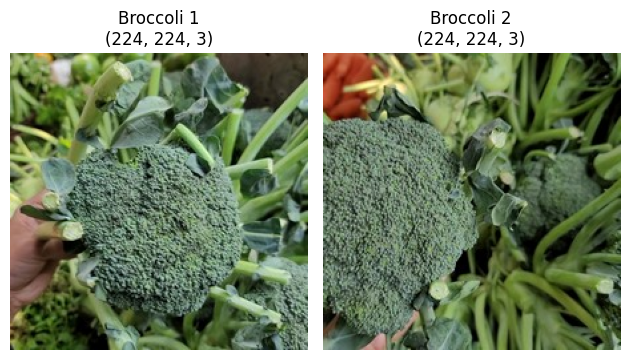

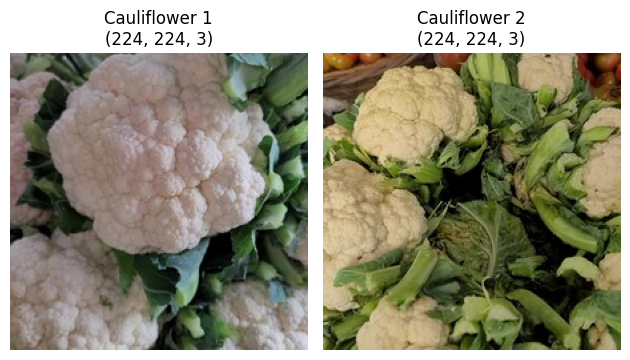

In [6]:
# contoh menampilkan gambar secara acak
view_random_image("train", "Broccoli", 1, 2)
view_random_image("train", "Cauliflower", 1, 2)

## 1.2. Image Data Generator

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
tf.random.set_seed(42)

# pengaturan data training dengan scaling images saja
# train_datagen = ImageDataGenerator(rescale=1.0 / 255)

# pengaturan data training dengan berbagai augmentasi
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# pengaturan data validasi selama pelatihan
val_datagen = ImageDataGenerator(rescale=1./255)

# pengaturan data uji untuk evaluasi model
test_datagen = ImageDataGenerator(rescale=1./255)

# menentukan ukuran gambar untuk proses pelatihan
img_size = (224, 224)

# menyiapkan data training dengan pengaturan yang sudah ditentukan
train_data = train_datagen.flow_from_directory(images_path + train_path,
                                               target_size=img_size,
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

 # menyiapkan data validasi
val_data = val_datagen.flow_from_directory(images_path + val_path,
                                           target_size=img_size,
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)

# menyiapkan data uji
test_data = test_datagen.flow_from_directory(images_path + test_path,
                                             target_size=img_size,
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


## MODEL CNN

## 2.1. Mebuat Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [11]:
# Cek apakah GPU terdeteksi
if tf.test.gpu_device_name():
    print(f"GPU detected: {tf.test.gpu_device_name()}")
else:
    print("No GPU detected")

GPU detected: /device:GPU:0


In [12]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3))
)
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2), padding="valid"))

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(2, activation="softmax"))  # number of neurons have to match number of class

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

# Fit the model
history_1 = model_1.fit(
        train_data,
        validation_data=val_data,
        epochs=10,
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 426s 6s/step - accuracy: 0.5716 - loss: 0.9687 - val_accuracy: 0.9500 - val_loss: 0.1680
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 510ms/step - accuracy: 0.9134 - loss: 0.2304 - val_accuracy: 0.9725 - val_loss: 0.1049
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 515ms/step - accuracy: 0.9497 - loss: 0.1550 - val_accuracy: 0.9250 - val_loss: 0.1638
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 516ms/step - accuracy: 0.8947 - loss: 0.2683 - val_accuracy: 0.9675 - val_loss: 0.1029
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 520ms/step - accuracy: 0.9614 - loss: 0.1171 - val_accuracy: 0.9875 - val_loss: 0.0748
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 520ms/step - accuracy: 0.9624 - loss: 0.1140 - val_accuracy: 0.9575 - val_loss: 0.1063
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 506ms/step - accuracy: 0.9092 - loss: 0.2190 - val_accuracy: 0.9750 - val_loss: 0.0696
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 514ms/step - accuracy: 0.9702 - loss: 0.0858 - val_accuracy: 0.9850 

In [13]:
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

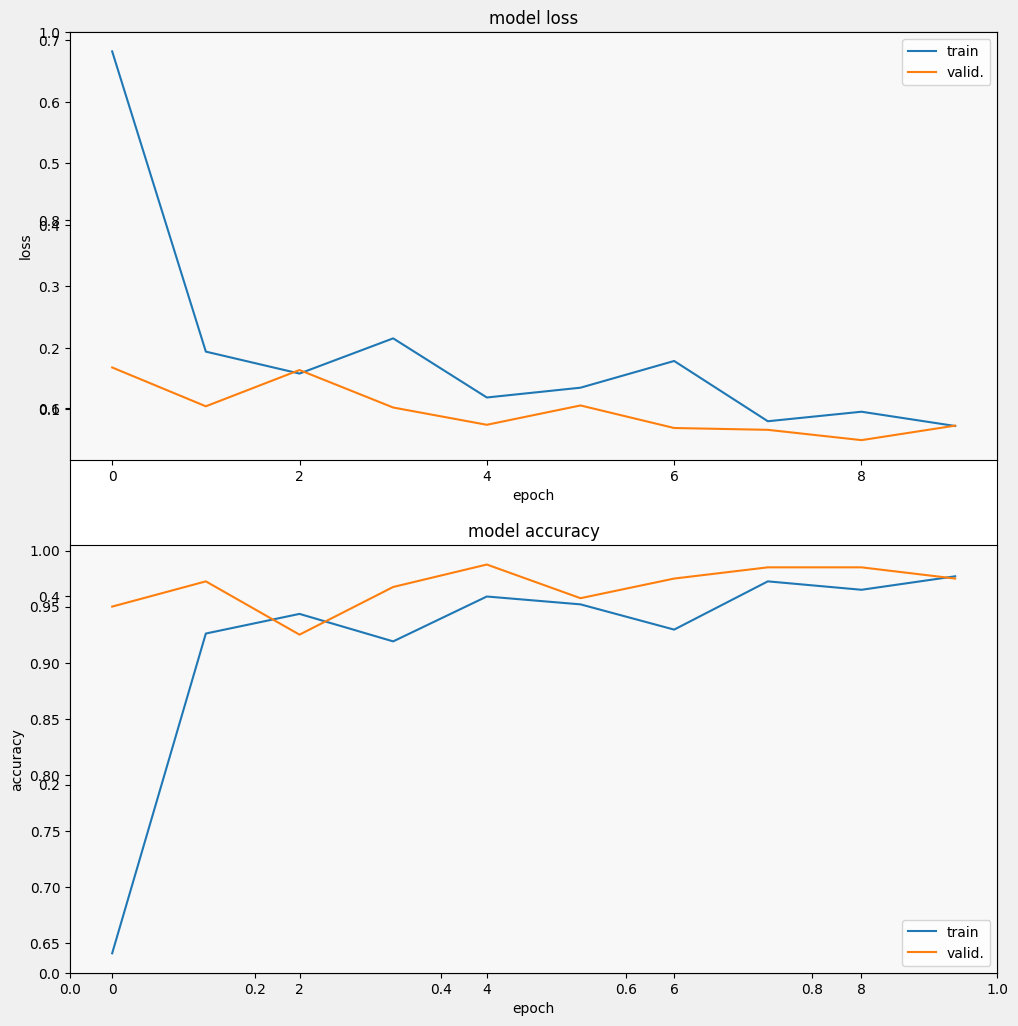

In [14]:
# Display training curves
display_training_curves(
    history_1.history['loss'],
    history_1.history['val_loss'],
    'loss', 211
)
display_training_curves(
    history_1.history['accuracy'],
    history_1.history['val_accuracy'],
    'accuracy', 212
)


## 2.2. Menyimpan dan Memuat Model

In [15]:
from tensorflow.keras.models import load_model

model_1.save("model_cnn.keras")

In [16]:
my_model_1 = load_model("model_cnn.keras")

In [17]:
my_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 20)        │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 20)        │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 20)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 50)        │           9,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 50)        │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 140450)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         280,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 950,048 (3.62 MB)

 Trainable params: 316,682 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 633,366 (2.42 MB)

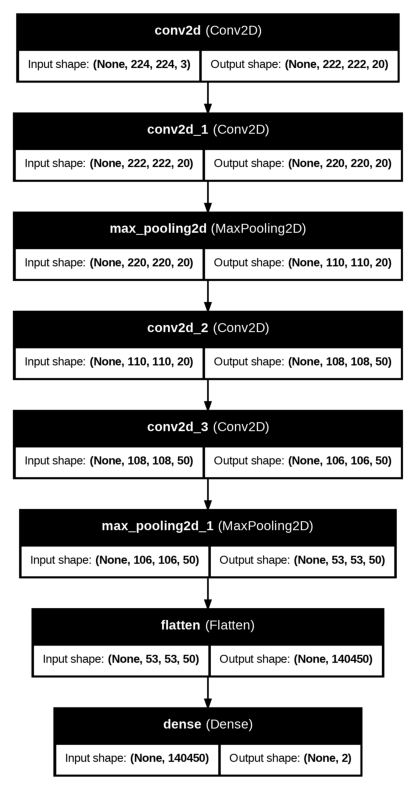

In [18]:
from tensorflow.keras.utils import plot_model
# Visualisasi model dengan plot_model
plot_model(model_1, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Menampilkan gambar dari file yang telah disimpan
img = plt.imread('model_structure.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

## 1.3. Evaluasi dan Prediksi

In [19]:
model_1.evaluate(test_data)  # Mengevaluasi performa model_1 terhadap data uji (test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.9894 - loss: 0.0297


[0.061364997178316116, 0.9775000214576721]

In [20]:
predictions = model_1.predict(test_data) # Membuat prediksi menggunakan model_1 berdasarkan data uji (test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step


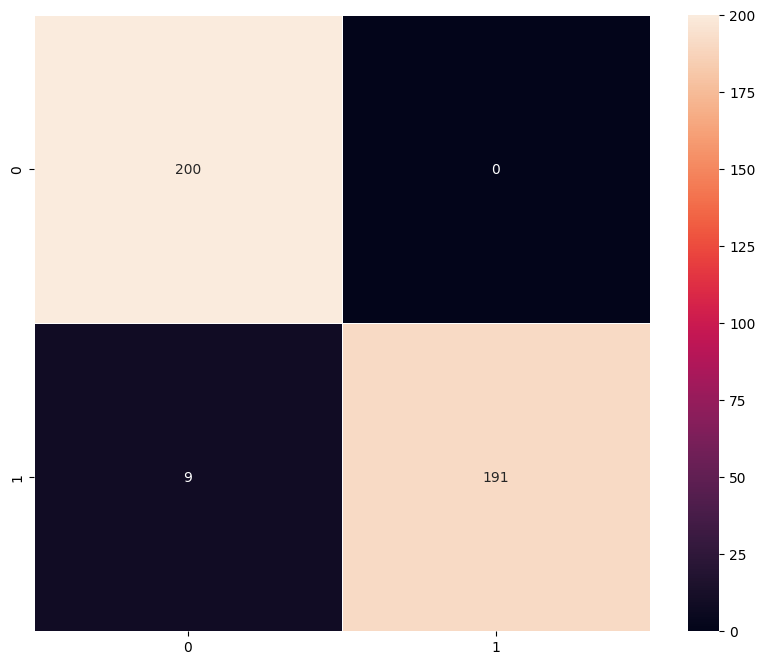

In [21]:
#Confusion Matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step


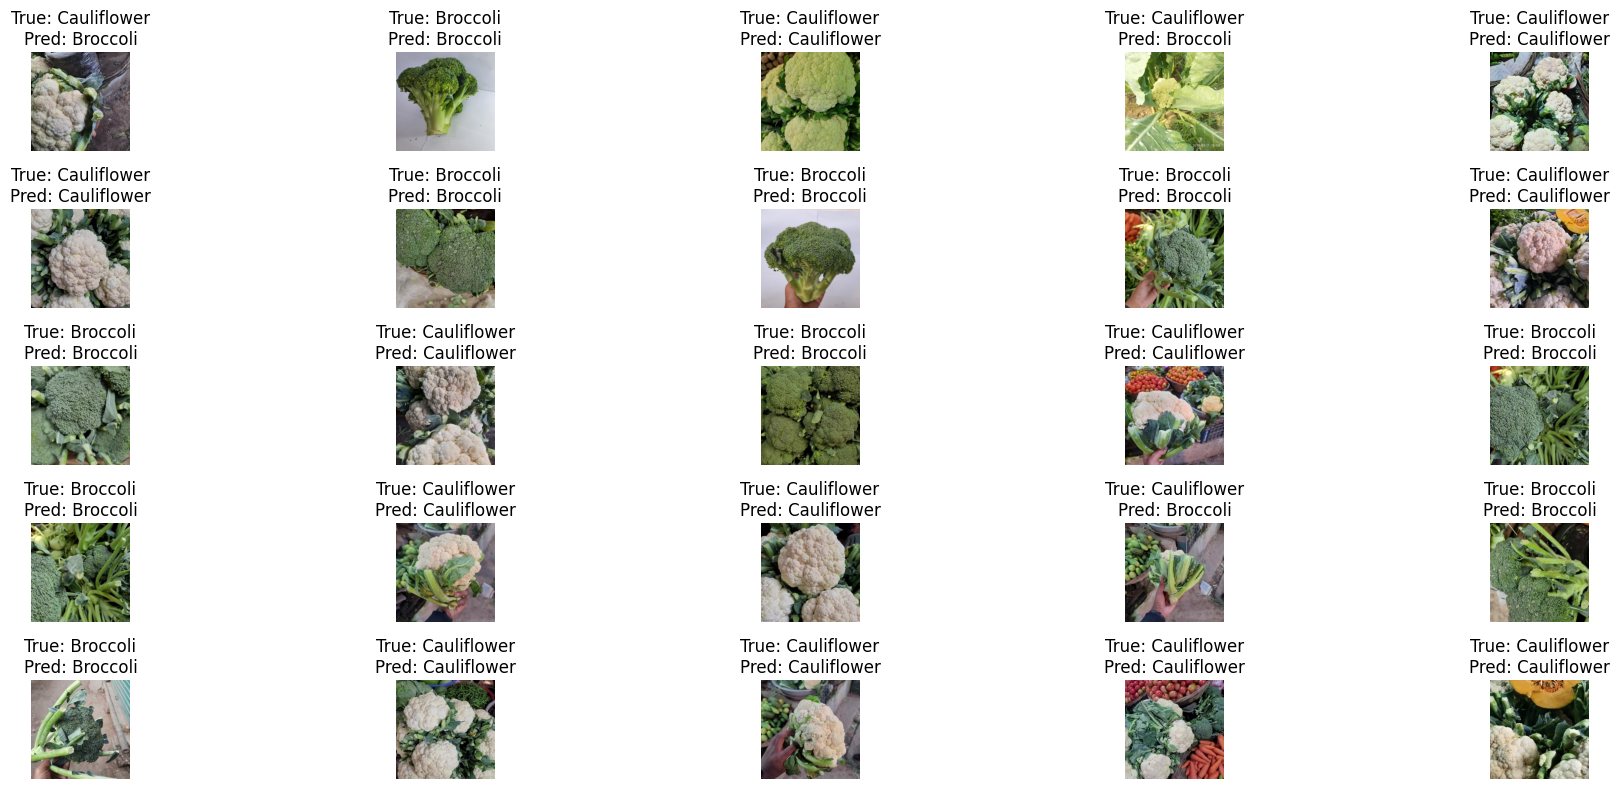

In [27]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Membuat prediksi pada data uji
predictions = model_1.predict(test_data)
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes

# Mendapatkan daftar label kelas
class_labels = list(test_data.class_indices.keys())

# Fungsi untuk menampilkan gambar uji dengan label asli dan prediksi
def view_random_test_images(test_data, y_true_class, y_pred_class, n_images=10):
    # Memilih gambar acak dari data uji
    random_indices = random.sample(range(len(test_data.filenames)), n_images)
    fig, axs = plt.subplots(5, 5, figsize=(20, 8))

    for i, idx in enumerate(random_indices):
        # Mendapatkan path gambar
        img_path = test_data.filepaths[idx]
        img = mpimg.imread(img_path)

        # Menampilkan gambar
        ax = axs[i // 5, i % 5]  # Mengatur subplot posisi
        ax.imshow(img)
        true_label = class_labels[y_true_class[idx]]
        pred_label = class_labels[y_pred_class[idx]]

        # Menampilkan label asli dan prediksi
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi untuk menampilkan 25 gambar uji dengan label
view_random_test_images(test_data, y_true_class, y_pred_class, n_images=25)


## MEMBUAT MODEL (DENGAN PRETRAINED MODEL)

## Model CNN dengan Model Dasar VGG16

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Membuat base model menggunakan VGG16 pre-trained weights
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# Membekukan parameter pada base model
base_model.trainable = False

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Connect the base model to the input layer
x = base_model(input_tensor)

# Add Dense layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_tensor = Dense(2, activation='softmax')(x)

# Create the model
model_2 = Model(inputs=input_tensor, outputs=output_tensor)

# Compile model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melihat ringkasan model
model_2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

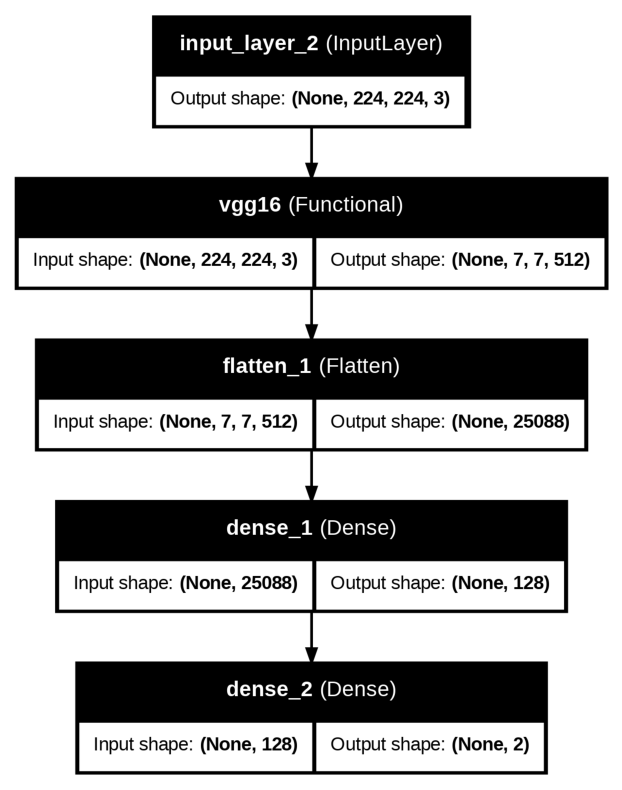

In [30]:
from tensorflow.keras.utils import plot_model
# Visualisasi model dengan plot_model
plot_model(model_2, to_file='model_structure vgg16.png', show_shapes=True, show_layer_names=True)

# Menampilkan gambar dari file yang telah disimpan
img = plt.imread('model_structure.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
# Fit the model
history_2 = model_2.fit(
        train_data,
        validation_data=val_data,
        epochs=5,
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 708ms/step - accuracy: 0.7504 - loss: 1.2663 - val_accuracy: 0.9975 - val_loss: 0.0108
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 519ms/step - accuracy: 0.9926 - loss: 0.0254 - val_accuracy: 0.9950 - val_loss: 0.0105
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 511ms/step - accuracy: 0.9947 - loss: 0.0198 - val_accuracy: 0.9925 - val_loss: 0.0110
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 528ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9975 - val_loss: 0.0054
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 547ms/step - accuracy: 0.9979 - loss: 0.0130 - val_accuracy: 0.9975 - val_loss: 0.0043


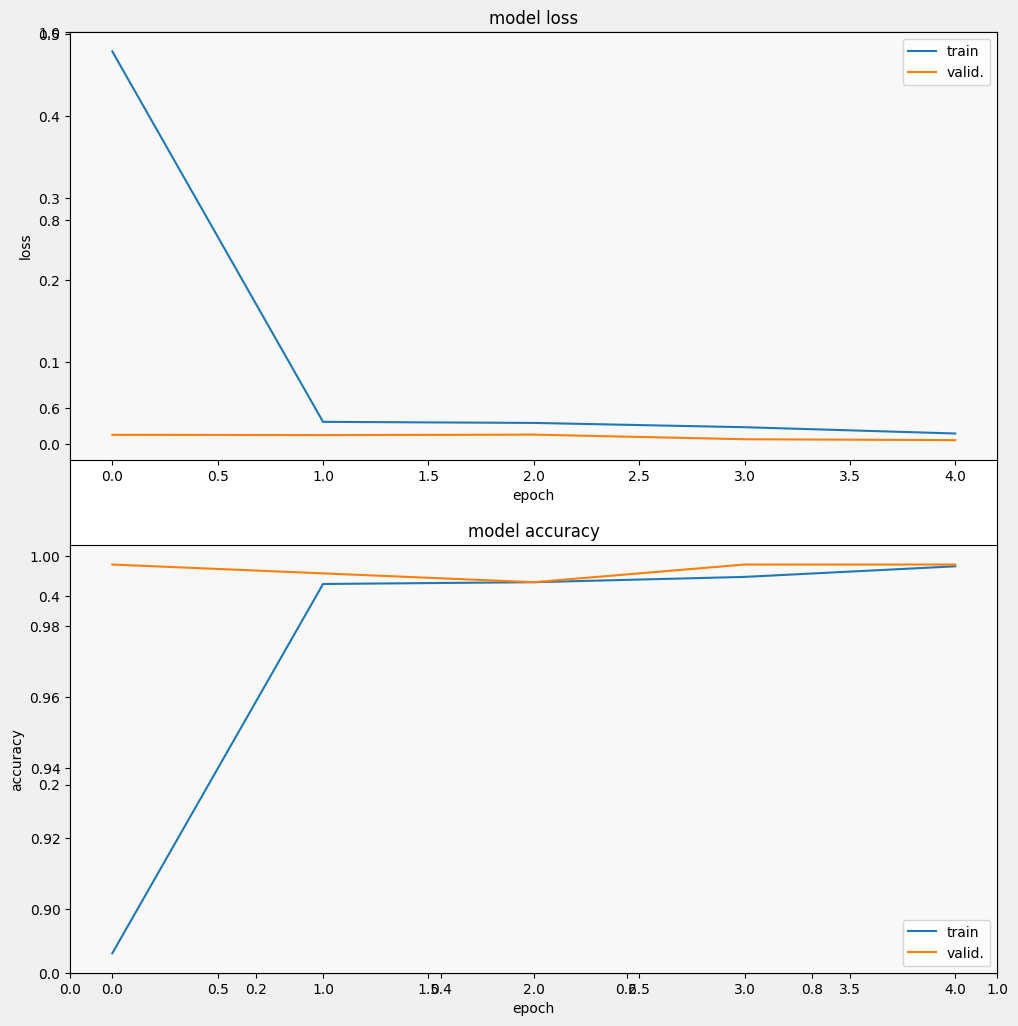

In [32]:
# Display training curves
display_training_curves(
    history_2.history['loss'],
    history_2.history['val_loss'],
    'loss', 211
)
display_training_curves(
    history_2.history['accuracy'],
    history_2.history['val_accuracy'],
    'accuracy', 212
)


In [33]:
# menyimpan model hasil pelatihan
model_2.save("model_with_vgg16.keras")

In [34]:
# memuat model hasil pelatihan
my_model_2 = load_model("model_with_vgg16.keras")

## 3.3. Evaluasi dan Prediksi

In [36]:
my_model_2.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.9978 - loss: 0.0071


[0.006428892724215984, 0.9975000023841858]

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step


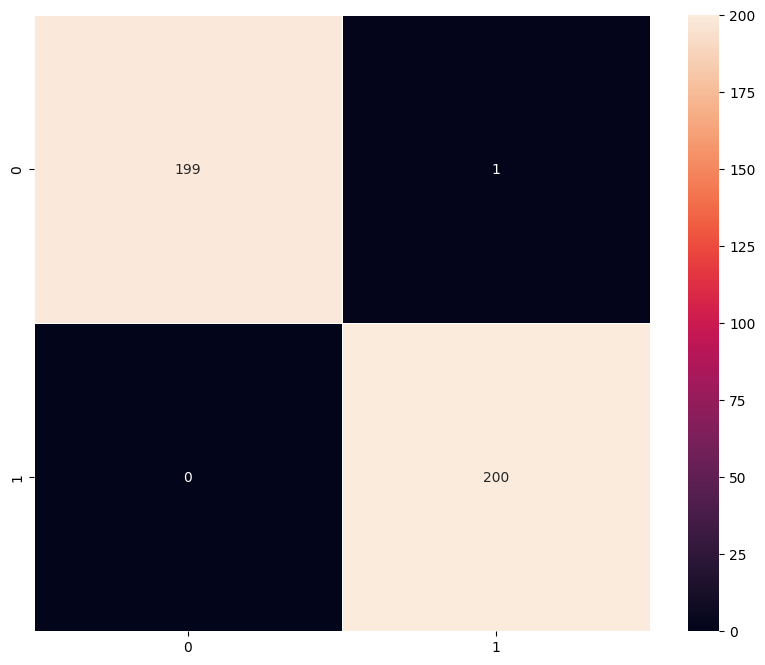

In [37]:
predictions = my_model_2.predict(test_data)
# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


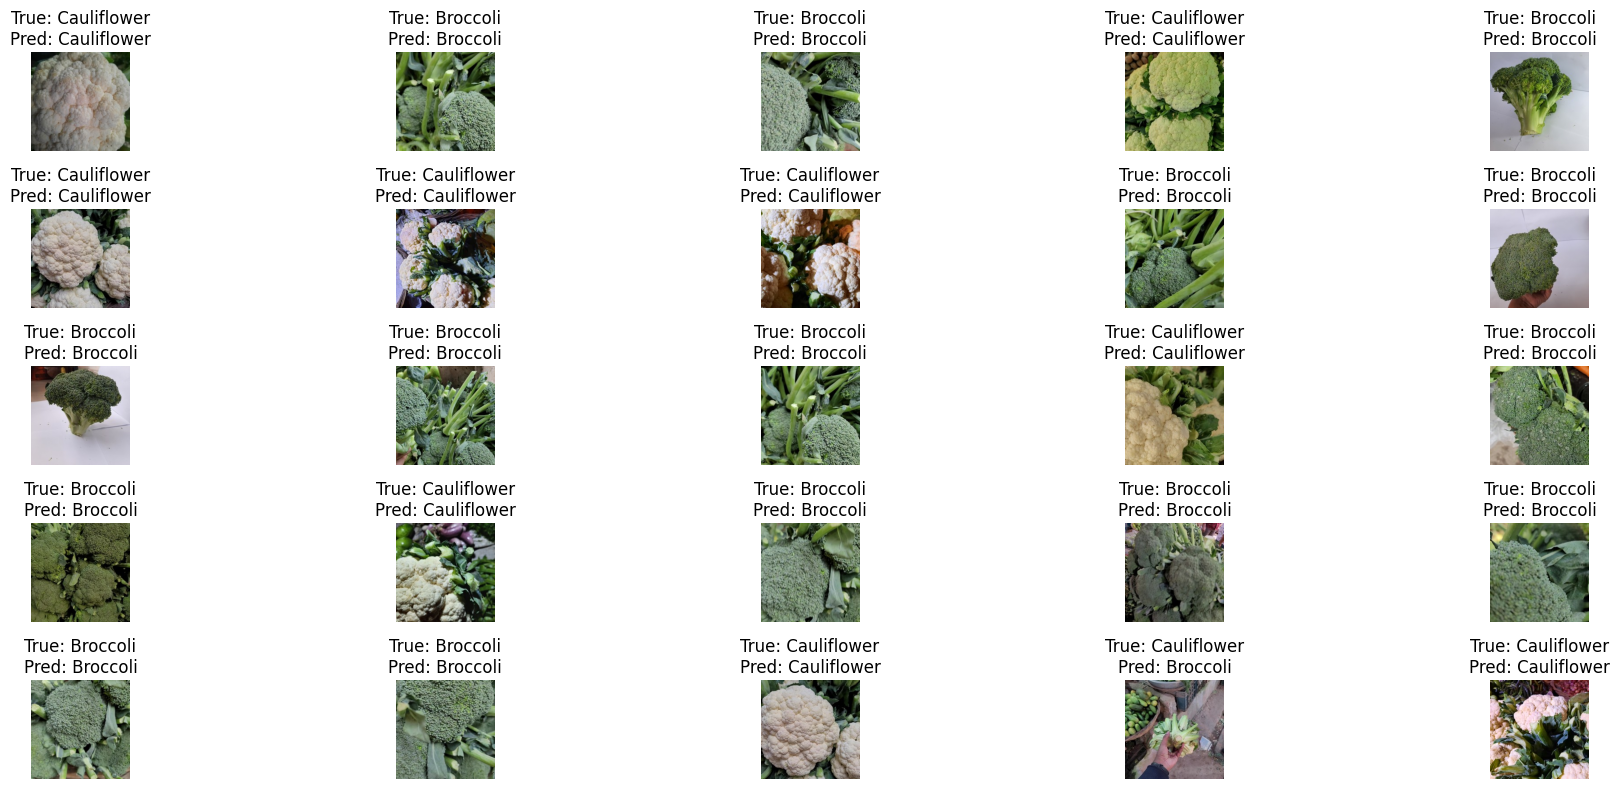

In [38]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Membuat prediksi pada data uji
predictions = model_1.predict(test_data)
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes

# Mendapatkan daftar label kelas
class_labels = list(test_data.class_indices.keys())

# Fungsi untuk menampilkan gambar uji dengan label asli dan prediksi
def view_random_test_images(test_data, y_true_class, y_pred_class, n_images=10):
    # Memilih gambar acak dari data uji
    random_indices = random.sample(range(len(test_data.filenames)), n_images)
    fig, axs = plt.subplots(5, 5, figsize=(20, 8))  # Mengatur 2 baris dan 5 kolom

    for i, idx in enumerate(random_indices):
        # Mendapatkan path gambar
        img_path = test_data.filepaths[idx]
        img = mpimg.imread(img_path)

        # Menampilkan gambar
        ax = axs[i // 5, i % 5]  # Mengatur subplot posisi
        ax.imshow(img)
        true_label = class_labels[y_true_class[idx]]
        pred_label = class_labels[y_pred_class[idx]]

        # Menampilkan label asli dan prediksi
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi untuk menampilkan 10 gambar uji dengan label
view_random_test_images(test_data, y_true_class, y_pred_class, n_images=25)


<br>
<hr>

notebook ini hanya berisi sintaks dan sedikit komentar saja. Untuk penjelasan lebih lengkap dapat dilihat pada tautan ini:
  
**[Model CNN untuk Klasifikasi Gambar](https://sainsdata.id/machine-learning/2729/model-convolution-neural-network-untuk-klasifikasi-gambar-menggunakan-tensorflow/)**

<hr>